# Multivariate Linear Regression

Hypothesis in Multivariate Regression

$$ h_\theta (x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots + \theta_n x_n $$

### Feature Scaling

We can speed up gradient descent by having each of our input values in roughly the same range. This is because θ will descend quickly on small ranges and slowly on large ranges, and so will oscillate inefficiently down to the optimum when the variables are very uneven.
The way to prevent this is to modify the ranges of our input variables so that they are all roughly the same. Ideally:
$−1≤xi≤1$
or
$−0.5≤xi≤0.5$

Two techniques to help with this are feature scaling and mean normalization. Feature scaling involves dividing the input values by the range (i.e. the maximum value minus the minimum value) of the input variable, resulting in a new range of just 1. Mean normalization involves subtracting the average value for an input variable from the values for that input variable, resulting in a new average value for the input variable of just zero. To implement both of these techniques, adjust your input values as shown in this formula:

$$x_i := \dfrac{x_i - \mu_i}{s_i}$$

Where $\mu_i$ is the average of all the values and $s_i$ is the maximum of the range of values minus the minimum or $s_i$ is the standard deviation.

### Features and Polynomial Regression
We can improve our features and the form of our hypothesis function in a couple different ways.
We can combine multiple features into one. For example, we can combine $x_1$ and $x_2$ into a new feature $x_3$ by taking $x_1 * x_2$.
Polynomial Regression
Our hypothesis function need not be linear (a straight line) if that does not fit the data well.
We can change the behavior or curve of our hypothesis function by making it a quadratic, cubic or square root function (or any other form).
For example, if our hypothesis function is $h_\theta(x)=\theta_0+\theta_1*x_1$ then we can simply duplicate the instances of $x_1$ to get the quadratic function $h_\theta(x)=\theta_0+\theta_1*x_1+\theta_2*x^2_1$ or the cubic function $h_\theta(x)=\theta_0+\theta_1*x_1+\theta_2*x^2_1+\theta_3*x^3_1$
In the cubic version, we have created new features $x_2$ and $x_3$ where $x_2=x^2_1$ and $x_3=x^3_1$.
### Normal Equation
The "normal equation" is a version of finding the optimum without iteration.
$$ 
\large
\theta = (X^T X)^{-1}X^T y $$

There is no need to do feature scaling with the normal equation.
The following is a comparison of gradient descent and the normal equation:

| Gradient Descent           | Normal Equation         |
|----------------------------|-------------------------|
| Need to choose alpha       | No need for alpha       |
| Needs many iterations      | No iterations           |
| Works well when n is large | Slow if n is very large |

With the normal equation, computing the inversion has complexity $\mathcal{O}(n3)$. So if we have a very large number of features, the normal equation will be slow. In practice, according to A. Ng, when n exceeds 10,000 it might be a good time to go from a normal solution to an iterative process.

# Assignment 1

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython import display
from pandas.tools.plotting import scatter_matrix

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

### Linear regression with one variable
In this part of this exercise, you will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. 

You would like to use this data to help you select which city to expand to next.
The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

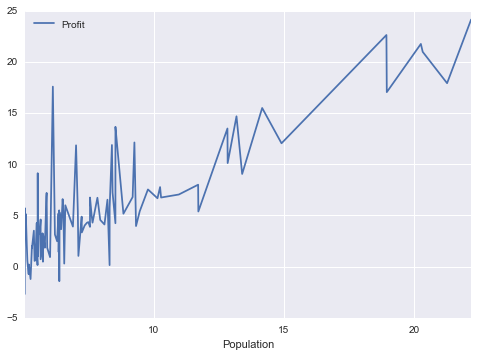

In [3]:
data = pd.read_csv('Exercises_1/ex1/ex1data1.txt', header=None, names=['Population', 'Profit'])
# Always sort your dataframe! 
data = data.sort('Population')
# Use a semi-colon at the end of a plotting fn to hide garbage output
data.plot(x='Population', y='Profit');

### Plots Plots Plots
Here we'll compare some of the different ways to visualize this simple dataset using pandas and seaborn.

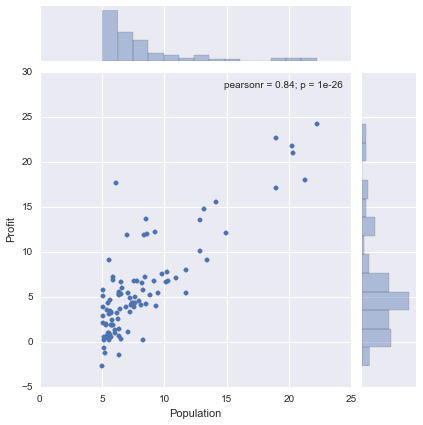

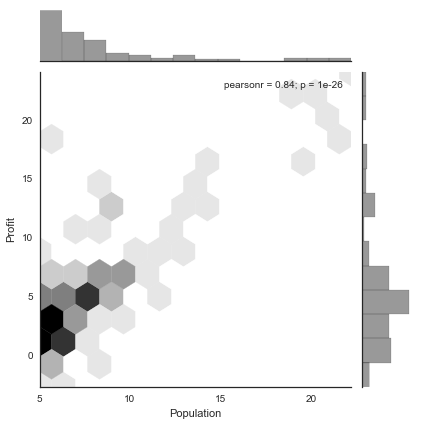

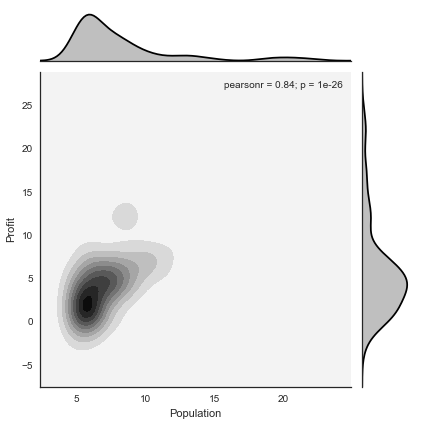

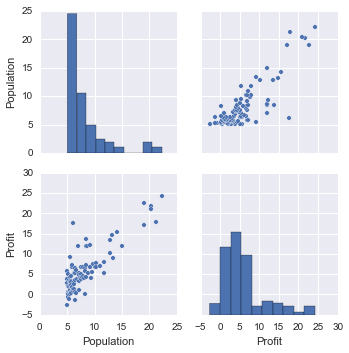

In [4]:
x = data['Population']
y = data['Profit']
# Here we'll compare some different ways to visualize our data. 
sns.jointplot(x, y);
# sexy context manager, way to go seaborn.
with sns.axes_style('white'):
    sns.jointplot(x, y, kind='hex', color='k');
    sns.jointplot(x, y, kind='kde', color='k');
sns.pairplot(data);

### Gradient Descent

Our objective will be to minimize the cost function
$$J(\theta) = \dfrac {1}{2m} \displaystyle \sum_{i=1}^m \left (h_\theta (x^{(i)}) - y^{(i)} \right)^2 $$ 
Where our hypothesis is
$$h_\theta (x) = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \theta_3 x_3 + \cdots + \theta_n x_n$$

Recall that the parameters of your model are the θj values. These are the values you will adjust to minimize cost J(θ). One way to do this is to use the batch gradient descent algorithm. In batch gradient descent, each iteration performs the update
$$\begin{align*}
& \text{repeat until convergence:} \; \lbrace \newline 
\; & \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_0^{(i)}\newline
\; & \theta_1 := \theta_1 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_1^{(i)} \newline
\; & \theta_2 := \theta_2 - \alpha \frac{1}{m} \sum\limits_{i=1}^{m} (h_\theta(x^{(i)}) - y^{(i)}) \cdot x_2^{(i)} \newline
& \cdots
\newline \rbrace
\end{align*}$$

In [5]:
# Insert a column vector of '1's that represent x_0 into our dataframe
data.insert(0, 'x_0', value=np.ones([len(data),1]))
# Create our starting values theta: a 2,1 matrix that starts at 0 and has no slope.
theta = pd.DataFrame(0, index=np.arange(2), columns=[0])

In [6]:
data.head()

,x_0,Population,Profit
74,1,5.0269,-2.6807
77,1,5.0365,5.7014
9,1,5.0546,3.8166
89,1,5.0594,2.8214
46,1,5.0702,5.1337


In [7]:
theta

,0
0,0
1,0


In [8]:
def gradient_descent(data, theta, iterations=1500, alpha=0.01):
    '''
    Accepts a dataframe representing the data (and x_0)
    and a vector that represents theta_0 and theta_1 and
    returns a vector representing the regressed fit to the data. 
    '''
    # Arrays are more efficient at row iteration for large m
    x = np.array(data.drop('Profit', 1))
    y = np.array(data['Profit'])
    # The number of samples in our dataset
    m = len(data)
    cost_fns = []
    for i in xrange(iterations):
        cost_fn = np.dot(x.T, np.dot(x,theta) - np.array([y]).T) / m
        theta = theta - (alpha * cost_fn)
        cost_fns.append(cost_fn)
        display.clear_output(wait=True)
        display.display(theta)
    return theta

In [21]:
new_theta = gradient_descent(data, theta)

,0
0,-3.630291
1,1.166362


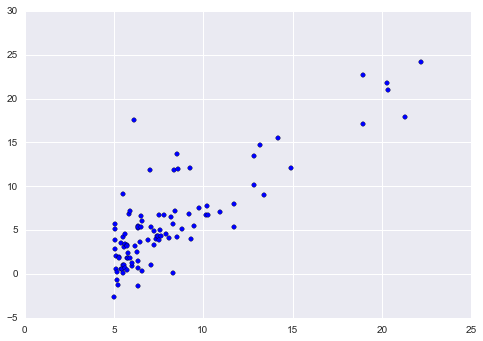

In [10]:
# Plot our data
plt.scatter(data['Population'], data['Profit']);

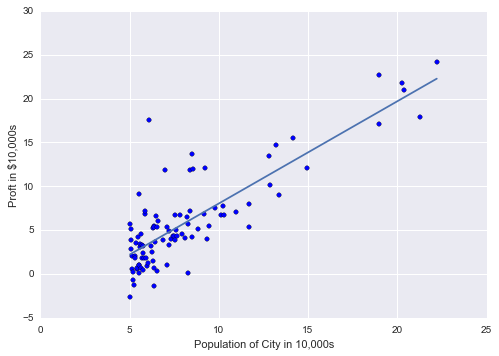

In [11]:
# Plot our data with our regression fit
theta_0 = new_theta[0][0]
theta_1 = new_theta[0][1]
x = data['Population']
y = theta_0 + x*theta_1

plt.plot(x,y);
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Proft in $10,000s')
plt.scatter(data['Population'], data['Profit']);

Your final values for θ will also be used to make predictions on profits in areas of 35,000 and 70,000 people.
Ergo, compute profits for x=3.5, and x=7.

In [12]:
y_35k = theta_0 + theta_1 * 3.5
y_70k = theta_0 + theta_1 * 7
print 'Profits for a population of 35k: {}, and for 70K: {}'.format(round(y_35k*1e4,2), round(y_70k*1e4,2))

Profits for a population of 35k: 4519.77, and for 70K: 45342.45


### Cool bonus! 
Let's redefine gradient descent to plot our data and get a live update of the regression line.

In [13]:
def gradient_descent_plot(data, theta, iterations=1500, alpha=0.01):
    '''
    Accepts a dataframe representing the data (and x_0)
    and a vector that represents theta_0 and theta_1 and
    returns a vector representing the regressed fit to the data. 
    '''
    # Arrays are more efficient at row iteration for large m
    x = np.array(data.drop('Profit', 1))
    y = np.array([data['Profit']])
    # The number of samples in our dataset
    m = len(data)
    cost_fns = []
    for i in xrange(iterations):
        cost_fn = np.dot(x.T, np.dot(x,theta) - y.T) / m
        theta = theta - (alpha * cost_fn)
        cost_fns.append(cost_fn)
        # Plot stuff
        if i%10 == 0:
            plt.cla()
            line_x = data['Population']
            line_y = theta[0][0] + line_x * theta[0][1]
            plt.plot(line_x,line_y);
            plt.xlabel('Population of City in 10,000s')
            plt.ylabel('Proft in $10,000s')
            plt.scatter(data['Population'], data['Profit']);
            display.display(plt.gcf())
            display.display(iterations-i)
            display.clear_output(wait=True)
    return theta

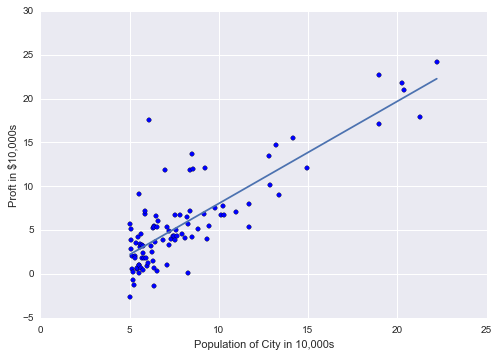

In [22]:
# This is slow to do every iteration so it updates ever 10 iterations
new_theta = gradient_descent_plot(data, theta)

### Visualize the Cost Function


In [15]:
def compute_cost_function(data, iterations=1500):
    """
    Given an area (in this case -10, 10) 
    """
    x = np.array(data.drop('Profit', 1))
    y = np.array([data['Profit']])
    m = len(data)
    z = []
    for i in np.arange(-10, 10, .1):
        column = []
        for j in np.arange(-10, 10, .1):
            theta = np.array([[i,j]]).T
            cost_fn = 1/(2.0*m) * np.dot((np.dot(x, theta) - y.T).T, (np.dot(x, theta) - y.T))
            column.append(float(cost_fn))
        z.append(column)
    
    return np.array(z)

In [16]:
z = compute_cost_function(data)

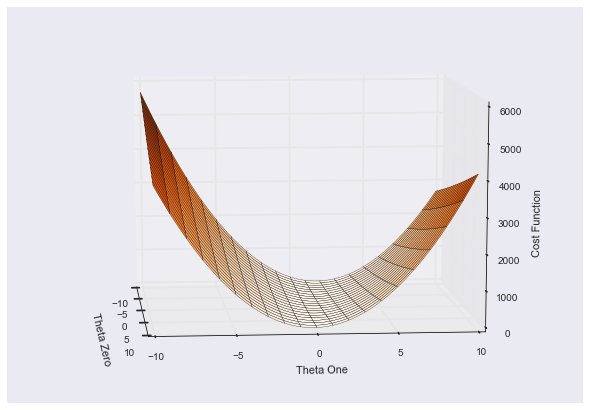

In [23]:
# Run this cell to get a sweet 360 degree view of our cost function!
x, y = np.arange(-10,10,.1), np.arange(-10,10,.1)
xx, yy = np.meshgrid(x,y,indexing='ij')
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = Axes3D(fig)
ax.plot_surface(xx, yy, z, cmap='Oranges')
ax.set_xlabel('Theta Zero')
ax.set_ylabel('Theta One')
ax.set_zlabel('Cost Function')
for ii in xrange(0,360,5):
    ax.view_init(elev=10., azim=ii)
    display.display(plt.gcf())
    display.clear_output(wait=True)

### Normal Equation

In [18]:
def normal_equation(data, theta):
    """
    This function will explicitly solve for theta that is the minimum of the cost fn
    θ = 􏰀 (X.T * X)^-1 􏰁 (X.T * ⃗y)
    """
    x = np.array(data.drop('Profit', 1)) # m by n
    y = np.array([data['Profit']]).T # m by 1
    
    first_component = np.linalg.inv(np.dot(x.T, x))
    second_component = np.dot(x.T, y)
    return np.dot(first_component, second_component)

In [19]:
min_theta = normal_equation(data, theta)

In [20]:
min_theta = pd.DataFrame(min_theta)
min_theta

,0
0,-3.895781
1,1.193034
